In [7]:
import numpy as np

def operations(h, w):
    """
    Takes two inputs, h and w, and makes two Numpy arrays A and B of size
    h x w, and returns A, B, and s, the sum of A and B.

    Arg:
      h - an integer describing the height of A and B
      w - an integer describing the width of A and B
    Returns (in this order):
      A - a randomly-generated h x w Numpy array.
      B - a randomly-generated h x w Numpy array.
      s - the sum of A and B.
    """
    A = np.random.rand(h,w)
    B = np.random.rand(h,w)

    sum = A + B
    #Your code here
    return A, B, sum

print(operations(3, 4))

(array([[0.81065186, 0.14767331, 0.51305836, 0.41734525],
       [0.0955273 , 0.8625193 , 0.20933008, 0.43659418],
       [0.52909641, 0.67410653, 0.57235898, 0.26618968]]), array([[0.44691335, 0.83446345, 0.00211451, 0.35091889],
       [0.06021011, 0.40966563, 0.78472337, 0.58717978],
       [0.11404608, 0.75299795, 0.52699052, 0.08893058]]), array([[1.25756521, 0.98213677, 0.51517286, 0.76826414],
       [0.15573741, 1.27218493, 0.99405345, 1.02377396],
       [0.64314249, 1.42710448, 1.09934949, 0.35512025]]))


In [8]:
import numpy as np

def norm(A, B):
    """
    Takes two Numpy column arrays, A and B, and returns the L2 norm of their
    sum.

    Arg:
      A - a Numpy array
      B - a Numpy array
    Returns:
      s - the L2 norm of A+B.
    """
    #Your code here
    return np.linalg.norm(A + B)

print(norm(np.array([1, 2, 3]), np.array([4, 5, 6])))

12.449899597988733


Here is a simplest Neural Network where the output $ z_1 = f(w_{11}x_1 + w_{21}x_2) $. where $f$ is a specified nonlinear function, and it is usually the hyperbolic tangent function, $\tanh$. We can develop a mathematical expression as $$ z_1 = \tanh (w^{T}\vec{x}) $$

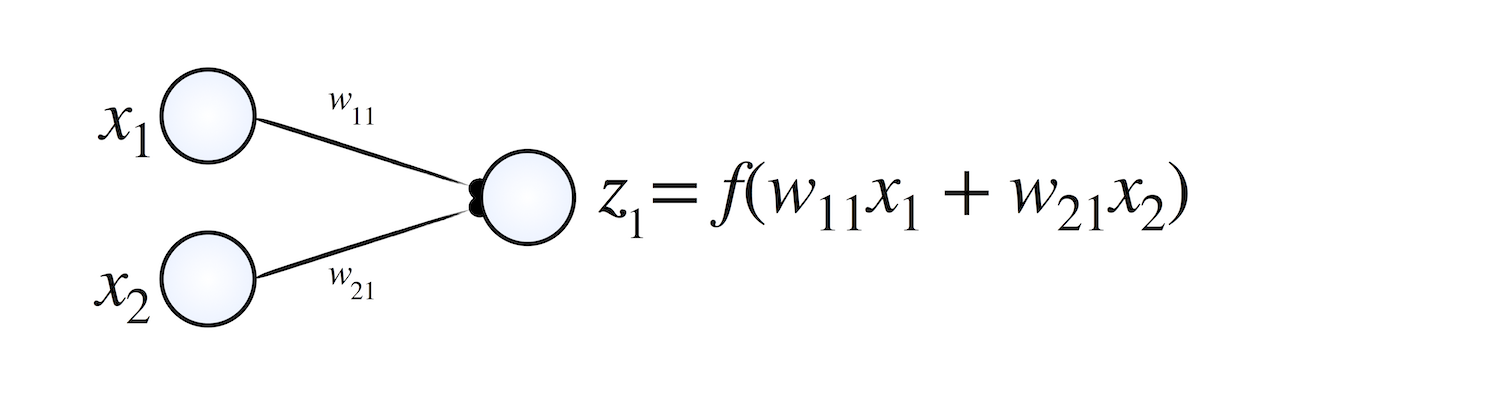

Write a function neural_network, which will apply a neural network operation with 2 inputs and 1 output and a given weight m

In [21]:

# here is the dot product of two vectors from "04 Points and Vectors" exercise
def dot(x, y):
    return sum(x_i * y_i for x_i, y_i in zip(x, y))

def neural_network(inputs, weights):
    """
     Takes an input vector and runs it through a 1-layer neural network
     with a given weight matrix and returns the output.

     Arg:
       inputs - 2 x 1 NumPy array
       weights - 2 x 1 NumPy array
     Returns (in this order):
       out - a 1 x 1 NumPy array, representing the output of the neural network
    """
    #Your code here
    dot_product = np.dot(weights.T, inputs) # the transpose wont have any effective given its 2x1
    return np.tanh(dot_product) 

neural_network(np.array([1, 2]), np.array([3, 4]))

0.9999999994421064

Calculate the `scalar_function` for given input `x` and `y`

$$ f(x,y)=\begin{cases}  x\cdot y, \text { if } x\le y\\ x/y, \text { else.} \end{cases} $$

In [27]:
def scalar_function(x, y):
    """
    Returns the f(x,y) defined in the problem statement.
    """
    if x <= y:
        return x*y
    else:
        return x/y
    
print(scalar_function(2, 3))



6


`scalar_function` can only handle scalar input, we could use the function `np.vectorize()` turn it into a vectorized function. Note that the input argument of np.vectorize() should be a scalar function, and the output of np.vectorize() is a new function that can handle vector input

In [26]:
def vector_function(x, y):
    """
    Make sure vector_function can deal with vector input x,y 
    """
    #Your code here
    scalar_function_v = np.vectorize(scalar_function)
    return scalar_function_v(x, y)

print(vector_function(2, 3))
print(vector_function(np.array([1,2]), np.array([1,2])))

6
[1 4]


In [104]:
# Fix the bug in the code
"""Original function
def get_sum_metrics(predictions, metrics=[]):
    for i in range(3):
        metrics.append(lambda x: x + i)

    sum_metrics = 0
    for metric in metrics:
        sum_metrics += metric(predictions)

    return sum_metrics
"""

def get_sum_metrics(predictions, metrics=[]):
    final_metrics = [lambda x, i=i: x + i for i in range(3)] + metrics

    sum_metrics = 0
    for metric in final_metrics:
        sum_metrics += metric(predictions)

    return sum_metrics

# Tests
print(get_sum_metrics(0))  # Should be (0 + 0) + (0 + 1) + (0 + 2) = 3
print(get_sum_metrics(1))  # Should be (1 + 0) + (1 + 1) + (1 + 2) = 6
print(get_sum_metrics(2))  # Should be (2 + 0) + (2 + 1) + (2 + 2) = 9
print(get_sum_metrics(3, [lambda x: x]))  # Should be (3) + (3 + 0) + (3 + 1) + (3 + 2) = 15
print(get_sum_metrics(0))  # Should be (0 + 0) + (0 + 1) + (0 + 2) = 3
print(get_sum_metrics(1))  # Should be (1 + 0) + (1 + 1) + (1 + 2) = 6
print(get_sum_metrics(2))  # Should be (2 + 0) + (2 + 1) + (2 + 2) = 9

3
6
9
15
3
6
9
